# Project: Wrangling and Analyze Data - We Rate Dogs Twitter Archive 

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [5]:
# import packages
import os
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")

In [6]:
# making a folder for all file downloads
folder_name = 'downloads'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# read the downloaded file using pandas
weRateDogs_df = pd.read_csv('downloads/twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [7]:
# defining the url we are getting the data from
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get the resources from the url
response = requests.get(url)

# access the resource and write to a file
with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
# read the downloaded file using pandas
image_prediction_df = pd.read_csv('downloads/image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweet_ids = weRateDogs_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('downloads/tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success
551: 804738756058218496
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
10

Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
13

Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
15

Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
18

Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [8]:
# container for all the tweets
tweets = []

# open the downloaded tweet-json file and read line by line and push each line to the tweets list
with open("downloads/tweet_json.txt") as file:
    for line in file:
        # converting the string into a dictionary
        data = json.loads(line) 
        tweets.append(data)

# Creating a data frame with all the tweet details
tweets_df = pd.DataFrame(tweets)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [9]:
# display the we rate dogs table
weRateDogs_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


`weRateDogs` columns:
- **tweet_id**: This is the unique identifier for the tweets in the weRateDogs dataframe
- **in_reply_to_status_id**: This is the ID of an existing status that the update is in reply to
- **in_reply_to_user_id**: This is an ID of an existing tweet if it is a reply to the original tweet's author ID
- **timestamp**: This is the timestamp when the tweet occured including the time and date
- **source**: This is the html link element that is embedded in every tweet showing which device the tweet is tweeted and a dfrom whether 'twitter for iPhone', 'twitter 
- **text**: This is the content of the tweet 
- **retweeted_status_id**: This is the retweet status id that shows when the tweet has been retweeted or not
- **retweeted_status_timestamp**: This is the retweet status timestamp that shows when the time and data if the retweetedm status id is true
- **expanded_urls**: This is the link to the tweet on the we rate dogs profile on twitter
- **rating_numerator**: This is the numerator of the rating given to the dogs in the tweet
- **rating_denominator**: This is the denominator of the rating given to the dogs in the tweet
- **name**: This is the name of the dog given in the rating in the tweet
- **doggo**: This is a category given to a dog in the tweet
- **floofer**: This is a category given to a dog in the tweet
- **pupper**: This is a category given to a dog in the tweet
- **puppo**: This is a category given to a dog in the tweet

In [10]:
# display the tweet image prediction table
image_prediction_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
# display the tweets table
tweets_df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",33821,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,7009,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",29324,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,5302,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22062,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,3482,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",36947,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,7228,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",35314,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,7764,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",17813,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,2602,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10368,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,1666,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56875,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,15759,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",24529,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,3623,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",27965,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,6101,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


From above, we can see the following dataframes:
1. **weRateDogs_df**: This is gotten from downloading the `twitter-archive-enhanced.csv` file through a given link
2. **image_prediction_df**: This is gotten from downloading the `image-predictions.tsv` file programmatically using the requests library
3. **tweets_df**: This is gotten from downloading the `tweet-json.txt` file programmatically using the tweepy library to query the Twitter API

Now I can use various pandas function to get some useful info all the dataframes which are:
* .head (DataFrame and Series)
* .tail (DataFrame and Series)
* .sample (DataFrame and Series)
* .info (DataFrame only)
* .describe (DataFrame and Series)
* .value_counts (Series only)

### Getting a random sample of 5 for all the dataframes

In [12]:
weRateDogs_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1233,712809025985978368,NaN,NaN,2016-03-24 01:11:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stubert. He just arrived. 10/10 https:...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712809025...,10,10,Stubert,None,None,None,None
2206,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Zeek. He is a grey Cumulonimbus. Zeek is ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377...,5,10,Zeek,None,None,None,None
1187,718460005985447936,NaN,NaN,2016-04-08 15:26:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bowie. He's listening for underground squ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718460005...,9,10,Bowie,None,None,None,None
1893,674752233200820224,NaN,NaN,2015-12-10 00:47:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everyone please just appreciate how perfect th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674752233...,12,10,None,None,None,None,None
2071,671115716440031232,NaN,NaN,2015-11-29 23:57:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671115716...,6,10,Phred,None,None,None,None


In [13]:
image_prediction_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
157,668852170888998912,https://pbs.twimg.com/media/CUg9gBvWoAAmx-2.jpg,1,golden_retriever,0.903529,True,Tibetan_mastiff,0.041497,True,kuvasz,0.022500,True
1968,868552278524837888,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,0.094991,True
754,688211956440801280,https://pbs.twimg.com/ext_tw_video_thumb/68821...,1,bannister,0.369449,False,four-poster,0.105307,False,shoji,0.098767,False


In [14]:
tweets_df.sample(5) 

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
1398,None,None,Thu Feb 11 20:34:41 +0000 2016,"[0, 126]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 697881447554613248, 'id_str'...",2790,False,This is Carter. He wakes up in the morning and...,None,...,NaN,NaN,NaN,NaN,1059,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1097,None,None,Wed May 11 00:43:55 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 730196697196822528, 'id_str'...",4452,False,This is Charles. He's camera shy. Tail longer ...,None,...,NaN,NaN,NaN,NaN,1710,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
212,None,None,Wed Apr 05 00:04:08 +0000 2017,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 849412289417494528, 'id_str'...",14688,False,This is Noosh. He noticed you were in the show...,None,...,NaN,NaN,NaN,NaN,2836,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2035,None,None,Mon Nov 30 02:31:34 +0000 2015,"[0, 143]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 671154565501296640, 'id_str'...",626,False,Meet Holly. She's trying to teach small human-...,None,...,NaN,NaN,NaN,NaN,186,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
491,None,None,Fri Dec 23 19:00:19 +0000 2016,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 812372222392303616, 'id_str'...",12944,False,This is Moe. He's a fetty woof. Got a cardboar...,None,...,NaN,NaN,NaN,NaN,3427,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Getting the general statistics for all the dataframes

In [15]:
weRateDogs_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
image_prediction_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
tweets_df.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2327.000000,2.327000e+03,7.700000e+01,7.700000e+01,2.600000e+01,2327.000000
mean,7056.223034,7.417930e+17,7.440692e+17,2.040329e+16,8.113972e+17,2472.124194
std,10965.183866,6.820795e+16,7.524295e+16,1.260797e+17,6.295843e+16,4186.464801
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,1.000000
25%,1226.500000,6.781394e+17,6.757073e+17,3.589728e+08,7.761338e+17,495.000000
50%,3052.000000,7.178418e+17,7.032559e+17,4.196984e+09,8.281173e+17,1149.000000
75%,8608.000000,7.986547e+17,8.233264e+17,4.196984e+09,8.637581e+17,2862.500000
max,144932.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,70771.000000


### Getting the general information for the all dataframes

In [18]:
weRateDogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2327 non-null object
display_text_range               2327 non-null object
entities                         2327 non-null object
extended_entities                2057 non-null object
favorite_count                   2327 non-null int64
favorited                        2327 non-null bool
full_text                        2327 non-null object
geo                              0 non-null object
id                               2327 non-null int64
id_str                           2327 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

### Getting value_counts() for important columns in the weRateDogs_df table

In [21]:
weRateDogs_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
weRateDogs_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [23]:
weRateDogs_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Checking the weRateDogs_df name column to see the name

In [24]:
weRateDogs_df.groupby('tweet_id')['name'].value_counts()

tweet_id            name    
666020888022790149  None        1
666029285002620928  a           1
666033412701032449  a           1
666044226329800704  a           1
666049248165822465  None        1
666050758794694657  a           1
666051853826850816  an          1
666055525042405380  a           1
666057090499244032  a           1
666058600524156928  the         1
666063827256086533  the         1
666071193221509120  None        1
666073100786774016  None        1
666082916733198337  None        1
666094000022159362  None        1
666099513787052032  None        1
666102155909144576  None        1
666104133288665088  None        1
666268910803644416  None        1
666273097616637952  None        1
666287406224695296  an          1
666293911632134144  a           1
666337882303524864  an          1
666345417576210432  None        1
666353288456101888  None        1
666362758909284353  None        1
666373753744588802  None        1
666396247373291520  None        1
666407126856765440 

### Checking the Dog categories whether they contain any other word asides from None

In [25]:
weRateDogs_df.groupby(['doggo']).size().reset_index(name="word count")

,doggo,word count
0,None,2259
1,doggo,97


In [26]:
weRateDogs_df.groupby(['floofer']).size().reset_index(name="word count")

,floofer,word count
0,None,2346
1,floofer,10


In [27]:
weRateDogs_df.groupby(['pupper']).size().reset_index(name="word count")

,pupper,word count
0,None,2099
1,pupper,257


In [28]:
weRateDogs_df.groupby(['puppo']).size().reset_index(name="word count")

,puppo,word count
0,None,2326
1,puppo,30


### Quality issues

1. `weRateDogs_df` table:
    - The values in the timestamp column should be converted from string to datatime data type
    - From the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, I can see that there are 181 retweets but we don't want retweets only original ratings
    - In the name column, some names aren't name at all but prononun, prepositions and adverb such as a, an, quite, the, such...
    - Put the rating_numerator and rating_denominator columns into a single column named `full_rating`
    - I feel that the html link element in the source column is unnecessary so I will just extract only the platform where the comes from
    
<br />

2. `image_prediction_df` table:
    - The columns p1, p2, p3 have "-" or "_" between some words 
    - The columns p1, p2, p3 have inconsistent values because some words start with either capital or small letters
    
<br />

3. `tweets_df` table:
    - I will remove unwanted columns such contributors, coordinates, created_at, display_text_range, display_text_range, display_text_range and so on  
    - Renaming the id column to tweet_id to match the other tables

### Tidiness issues
1. Dog categories are put in different columns when they are supposed to be in a single column based on the tweet

2. Drop unnecessary columns in the weRatedogs_df

2. Merge the dataframes to contain tweet ID, retweet count, and favorite count columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Quality Issues

In [29]:
# Make copies of original pieces of data 
weRateDogs_clean_df = weRateDogs_df.copy()
image_prediction_clean_df = image_prediction_df.copy()
tweets_clean_df = tweets_df.copy()

### Issue #1:

#### Define: The values in the timestamp column should be converted from string to datatime data type in weRateDogs_clean_df table

#### Code

In [30]:
weRateDogs_clean_df.timestamp = pd.to_datetime(weRateDogs_clean_df.timestamp)

#### Test

In [31]:
#  checking to see if the data type of the timestamp column is now datetime
weRateDogs_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2:

#### Define: From the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns, I can see that there are 181 retweets but we don't want retweets only original ratings in the weRateDogs_clean_df table

#### Code

In [32]:
weRateDogs_clean_df = weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_id.isnull()]

In [33]:
weRateDogs_clean_df = weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_id.isnull()]

In [34]:
weRateDogs_clean_df = weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_user_id.isnull()]

#### Test

In [35]:
weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [36]:
weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_timestamp.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
weRateDogs_clean_df[weRateDogs_clean_df.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define: In the name column of weRateDogs_clean_df table, some names aren't name at all but prononun, prepositions and adverb such as a, an, the, quite,  such...

#### Code

In [38]:
weRateDogs_clean_df.name = weRateDogs_clean_df.name.replace(['a','an','the','quite','such'], None)

#### Test

In [39]:
weRateDogs_clean_df.name.value_counts()

None       714
Oliver      12
Charlie     11
Lucy        11
Cooper      10
Tucker       9
Penny        9
Daisy        8
Lola         8
Sadie        8
Winston      8
Toby         7
Stanley      7
Koda         6
Bo           6
Bailey       6
Oscar        6
Jax          6
Bella        6
Buddy        5
Scout        5
Walter       5
Leo          5
Rusty        5
Milo         5
Chester      5
Dave         5
Jeffrey      5
Bentley      5
Louis        5
          ... 
Crumpet      1
Oreo         1
Ivar         1
Wishes       1
Hector       1
Geno         1
Tyrus        1
Sonny        1
Nimbus       1
Gustav       1
Hazel        1
Bowie        1
Cedrick      1
Dante        1
Joshwa       1
Rontu        1
Striker      1
Eugene       1
Corey        1
Miley        1
mad          1
Derby        1
Mo           1
Tassy        1
Shooter      1
Gromit       1
Buckley      1
Dallas       1
Gin          1
Karma        1
Name: name, Length: 951, dtype: int64

### Issue #4

#### Define: Put the rating_numerator and rating_denominator columns into a single column named `full_rating` in the weRateDogs_clean_df table

#### Code

In [40]:
weRateDogs_clean_df['full_rating'] = ( weRateDogs_clean_df.rating_numerator.apply(str) + "/" +weRateDogs_clean_df.rating_denominator.apply(str) )

#### Test

In [41]:
weRateDogs_clean_df[['full_rating', 'rating_numerator', 'rating_denominator']].head()

,full_rating,rating_numerator,rating_denominator
0,13/10,13,10
1,13/10,13,10
2,12/10,12,10
3,13/10,13,10
4,12/10,12,10


In [42]:
weRateDogs_clean_df.dtypes

tweet_id                               int64
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                                object
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                       int64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
full_rating                           object
dtype: object

### Issue #5

#### Define: Extract only the platform where the tweet comes from the source column  in the weRateDogs_clean_df table

#### Code

In [43]:
weRateDogs_clean_df.source = weRateDogs_clean_df.source.str.extract('(W\w+\sC\w+|iP\w+|V\w+|twe\w+)', expand=True)

#### Test

In [44]:
weRateDogs_clean_df.source.value_counts()

iPhone        2042
Vine            91
Web Client      31
tweetdeck       11
Name: source, dtype: int64

### Issue #6

#### Define: The columns p1, p2, p3 have "-" or "_" between some words in the image prediction clean df table so I will replace them with a space

#### Code

In [45]:
image_prediction_clean_df.p1 = image_prediction_clean_df.p1.str.replace("_"," ")
image_prediction_clean_df.p1 = image_prediction_clean_df.p1.str.replace("-"," ")

image_prediction_clean_df.p2 = image_prediction_clean_df.p2.str.replace("_"," ")
image_prediction_clean_df.p2 = image_prediction_clean_df.p2.str.replace("-"," ")

image_prediction_clean_df.p3 = image_prediction_clean_df.p3.str.replace("_"," ")
image_prediction_clean_df.p3 = image_prediction_clean_df.p3.str.replace("-"," ")

#### Test

In [46]:
image_prediction_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue #7

#### Define: The columns p1, p2, p3 have inconsistent values because some words start with either capital or small letters in the image_prediction_clean_df table. Therefore, I will make it consistent by changing the word to start and end with small letters

#### Code

In [47]:
image_prediction_clean_df.p1 = image_prediction_clean_df.p1.str.lower()

image_prediction_clean_df.p2 = image_prediction_clean_df.p2.str.lower()

image_prediction_clean_df.p3 = image_prediction_clean_df.p3.str.lower()

#### Test

In [48]:
image_prediction_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8

#### Define: I will remove unwanted columns such contributors, coordinates, created_at, display_text_range, display_text_range, display_text_range and so on tweets_clean_df table leaving the tweet_id which is id , retweet_count  and  favorite_count columns

#### Code

In [49]:
tweets_clean_df.drop(columns =['contributors', 'coordinates', 'created_at', 'display_text_range','entities', 'extended_entities', 'favorited',
       'full_text', 'geo', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_permalink', 'quoted_status_id', 'quoted_status_id_str', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],  inplace = True)

#### Test

In [50]:
tweets_clean_df.columns

Index(['favorite_count', 'id', 'retweet_count'], dtype='object')

### Issue #9

#### Define: Renaming the id column to tweet_id to match the other tables for the tweets_clean_df table

#### Code

In [51]:
tweets_clean_df.rename(columns= {'id':'tweet_id'} , inplace = True)

#### Test

In [52]:
tweets_clean_df.columns

Index(['favorite_count', 'tweet_id', 'retweet_count'], dtype='object')

#### Test

### Tidiness issues

### Issue #1

#### Define: The Dog categories are spilt in different columns instead of a single column named `dog_category` in weRateDogs_clean_df table

#### Code

In [53]:
# doggo_count = weRateDogs_clean_df.text.str.lower().str.contains('doggo').sum()
# if doggo_count > 0:
#     print(doggo_count)

weRateDogs_clean_df['dog_stages'] = weRateDogs_clean_df.text.str.lower().str.extract('(doggo|floofer|pupper|puppo)', expand=True)

#### Test

In [54]:
weRateDogs_clean_df.dog_stages.value_counts()

pupper     254
doggo       89
puppo       33
floofer      9
Name: dog_stages, dtype: int64

### Issue 2

#### Define: Removing columns that won't be needed in weRateDogs_clean_df

#### Code

In [55]:
# weRateDogs_clean_df.columns
weRateDogs_clean_df.drop(columns= ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [56]:
weRateDogs_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
full_rating           2175 non-null object
dog_stages            385 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 186.9+ KB


### Issue #3

#### Define: Merge the dataframes to contain tweet ID, retweet count, and favorite count columns

#### Code

In [57]:
twitter_archive_master_clean_df = pd.merge(weRateDogs_clean_df, tweets_clean_df, how='inner')

In [58]:
twitter_archive_master_clean_df = pd.merge(twitter_archive_master_clean_df, image_prediction_clean_df, how='inner')

In [59]:
twitter_archive_master = twitter_archive_master_clean_df.copy()

#### Test

In [60]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 23 columns):
tweet_id              1986 non-null int64
timestamp             1986 non-null datetime64[ns]
source                1986 non-null object
text                  1986 non-null object
expanded_urls         1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
name                  1986 non-null object
full_rating           1986 non-null object
dog_stages            340 non-null object
favorite_count        1986 non-null int64
retweet_count         1986 non-null int64
jpg_url               1986 non-null object
img_num               1986 non-null int64
p1                    1986 non-null object
p1_conf               1986 non-null float64
p1_dog                1986 non-null bool
p2                    1986 non-null object
p2_conf               1986 non-null float64
p2_dog                1986 non-null bool
p3                    1986 non-nul

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
twitter_archive_master.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Which dog stages are the most popular over the years?

2. Which months are tweets to the WeRateDogs twitter account the most ?

3. What are the top 10 names given to dogs ?

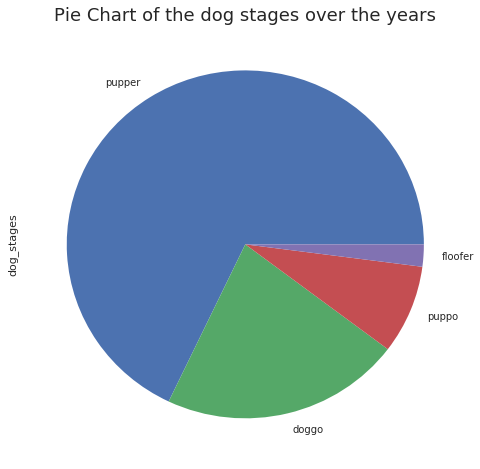

In [62]:
#  1. Which dog stages are the most popular over the years?
plt.figure(figsize=(12,10))
plt.title("Pie Chart of the dog stages over the years", fontsize=18);
ind = twitter_archive_master.dog_stages.value_counts().index
twitter_archive_master.dog_stages.value_counts()[ind].plot(kind='pie', figsize=(8,8));

With the above pie chart, we can clearly see that most dogs rated in we rate dogs twitter  ove the years are in the pupper stage

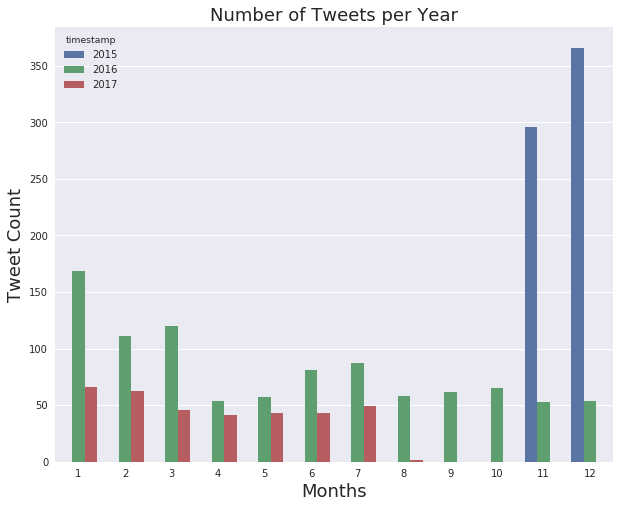

In [63]:
# 2. Which years had the most tweets put to the We Rate Dogs twitter profile
plt.figure(figsize=(10,8))
sns.countplot(pd.DatetimeIndex(twitter_archive_master.timestamp).month, hue=pd.DatetimeIndex(twitter_archive_master.timestamp).year)
plt.xlabel("Months", fontsize=18)

plt.ylabel("Tweet Count", fontsize=18)
plt.title("Number of Tweets per Year", fontsize=18)
plt.show()

With the above visualization, we can see that the year with the most tweets is  2015

In [64]:
# 3. What are the top 10 names given to dogs?
twitter_archive_master = twitter_archive_master[twitter_archive_master.name != 'None']
dog_breed = twitter_archive_master.groupby(['name'])
fav_dog_breed = dog_breed['favorite_count'].sum().sort_values(ascending = False)
fav_dog_breed.head(10)

name
Bo         159379
Stephan    111726
Jamesy     108937
Zoey        98799
Charlie     93245
Duddles     92907
Jeffrey     90079
Stanley     87809
Penny       87614
Gary        84126
Name: favorite_count, dtype: int64

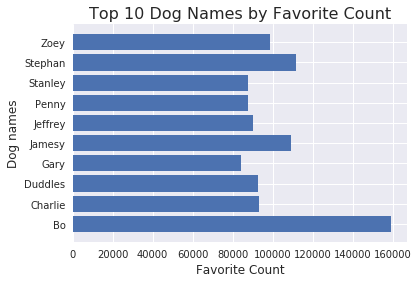

In [65]:
plt.barh(fav_dog_breed.head(10).index, fav_dog_breed.head(10))
plt.xlabel('Favorite Count', fontsize = 12)
plt.ylabel('Dog names', fontsize = 12)
plt.title('Top 10 Dog Names by Favorite Count', fontsize = 16)
plt.show();

With the above pie chart, we can see that mosttweets to the we rate dogs twiiter profile are made from an iPhone

### Visualization

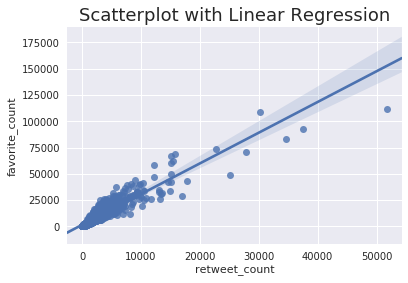

In [66]:
# plotting a scaterrplot to see if there is a correlation between the favorite_count and retweet_count
plt.title("Scatterplot with Linear Regression", fontsize=18);
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_master);

In [67]:
#checking the correlation bewtween retweet counts and favorite counts programmatically
print('The correlation between the retweet count and favorite count is', twitter_archive_master.retweet_count.corr(twitter_archive_master.favorite_count))

The correlation between the retweet count and favorite count is 0.925092521873


### Conclusion

From the above the visualizations and assessment done on the Twitter data - `twitter_archive_master.csv` that was gathered from various sources and cleaned to the best of my ability . i can deduce that the retweet count does indeed have a positive correlation with favourite count of tweets on the WeRateDogs Twitter profile.

### References

- [GeeksforGeeks](https://www.geeksforgeeks.org/)
- [Stackoverflow](https://stackoverflow.com/)
- [Pandas](https://pandas.pydata.org/)
- [Seaborn](https://seaborn.pydata.org/)